Exemples d'images


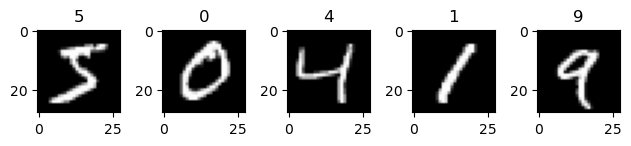

In [24]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Exemple d'autoencodeur simple pour images
"""
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0) # Pour résultats reproductibles
fonction_cout = torch.nn.MSELoss()

# Définition de l'architecture du RNA
class Autoencodeur(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encodeur = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,16)
        )
        self.decodeur = torch.nn.Sequential(
            torch.nn.Linear(16,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 28 * 28),
            torch.nn.Sigmoid()
        )
    def forward(self, lot_X):
        encode = self.encodeur(lot_X)
        decode = self.decodeur(encode)
        return decode 

modele = Autoencodeur() 

from torch import optim
optimiseur = optim.Adam(modele.parameters(), lr=1e-3)
import torchvision
import torchvision.transforms as transforms

#Chargement des données
ds_ent = torchvision.datasets.MNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
ds_test = torchvision.datasets.MNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())

#Création du DataLoader avec le dataset
dl_ent = torch.utils.data.DataLoader(ds_ent, batch_size=100)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size=100)

import numpy as np 
import matplotlib.pyplot as plt 
print("Exemples d'images")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    une_image = ds_ent[i][0]
    plt.imshow(ds_ent[i][0][0].numpy(), cmap='gray')
    plt.title(ds_ent[i][1]) 
plt.tight_layout() 
plt.show()



Entrainement du modèle :
-------- > epoch 1:  coût moyen entraînement = 0.06412137413397431
-------- > epoch 2:  coût moyen entraînement = 0.04005747159322103
-------- > epoch 3:  coût moyen entraînement = 0.03138349145029982
-------- > epoch 4:  coût moyen entraînement = 0.028443815987557172
-------- > epoch 5:  coût moyen entraînement = 0.02629076722388466
-------- > epoch 6:  coût moyen entraînement = 0.024848367950568596
-------- > epoch 7:  coût moyen entraînement = 0.023889439748600125
-------- > epoch 8:  coût moyen entraînement = 0.02311410422436893
-------- > epoch 9:  coût moyen entraînement = 0.022264112951233983
-------- > epoch 10:  coût moyen entraînement = 0.02146453130058944
-------- > epoch 11:  coût moyen entraînement = 0.02085748325412472
-------- > epoch 12:  coût moyen entraînement = 0.02037254162753622
-------- > epoch 13:  coût moyen entraînement = 0.02002365041524172
-------- > epoch 14:  coût moyen entraînement = 0.019768670257180928
-------- > epoch 15:  coût 

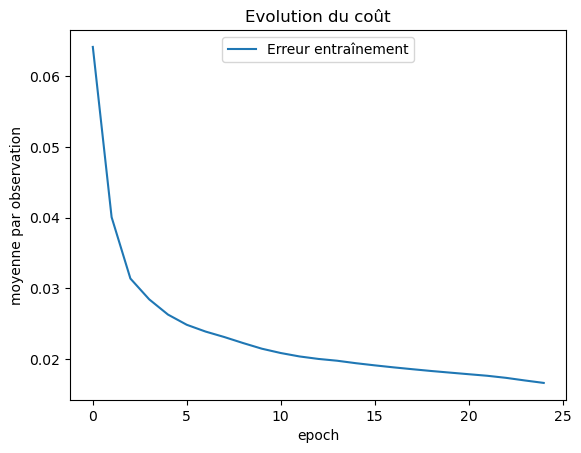

In [25]:
def entrainer(modele, dl_ent, optimiseur, nb_epochs=10):
    liste_cout_moyen_ent = []
    liste_predictions = []
    
    # Boucle d'apprentissage
    for epoch in range(nb_epochs):
        cout_total_ent = 0 # pour cumuler les couts par mini-lot
        modele.train() # Pour certains types de couches (nn.BatchNorm2d, nn.Dropout, ...)
        
        # Boucle d'apprentissage par mini-lot pour une epoch
        for lot_X, lot_Y in dl_ent:
            lot_X = lot_X.reshape(-1, 28*28)
            optimiseur.zero_grad() # Remettre les dérivées à zéro
            lot_predictions = modele(lot_X) # Appel de la méthode forward
            cout = fonction_cout(lot_predictions, lot_X)
            cout.backward() # Calcul des gradiants par rétropropagation
            with torch.no_grad():
                cout_total_ent +=cout.item()
            optimiseur.step() # Mise à jour des paramètres
        # Calculer les moyennes par mini-lot
        with torch.no_grad():
            cout_moyen_ent = cout_total_ent/len(dl_ent)
       
        modele.eval() # Pour certains types de couches (nn.BatchNorm2d, nn.Dropout, ...)
        print(f'-------- > epoch {epoch+1}:  coût moyen entraînement = {cout_moyen_ent}')
    
        liste_cout_moyen_ent.append(cout_moyen_ent)
        # Accumuler les prédictions pour fin d'illustration
        liste_predictions.append({'epoch':epoch,'lot_X': lot_X, 'lot_predictions': lot_predictions})

    
    # Afficher le graphique d'évolution du cout par epoch
    plt.plot(np.arange(0,nb_epochs),liste_cout_moyen_ent,label='Erreur entraînement')
    plt.title("Evolution du coût")
    plt.xlabel('epoch')
    plt.ylabel('moyenne par observation')
    plt.legend(loc='upper center')
    plt.show()
    
    return liste_predictions
print("Entrainement du modèle :")
liste_predictions=entrainer(modele, dl_ent, optimiseur, nb_epochs=25)

Évolution des prédictions pour les 5 premières images du dernier lot par epoch
Epoch: 0


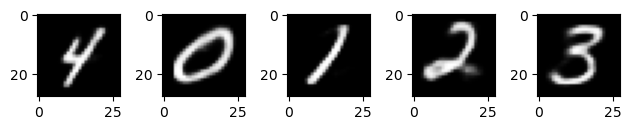

Epoch: 5


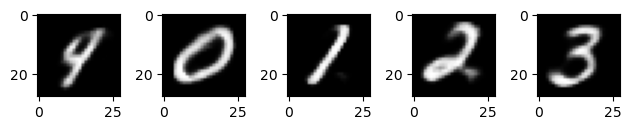

Epoch: 10


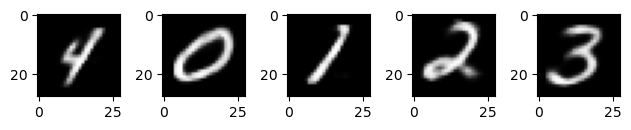

Epoch: 15


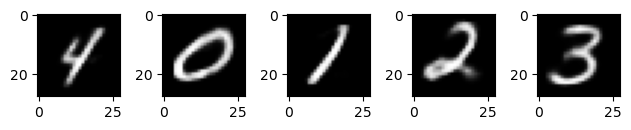

Epoch: 20


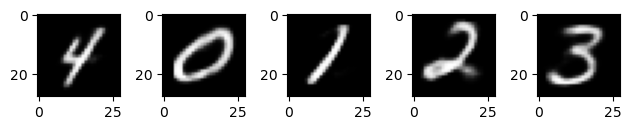

Epoch: 25


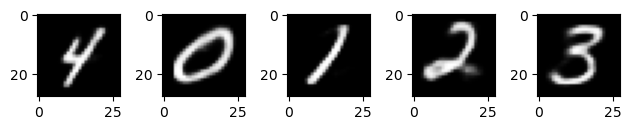

Images originales


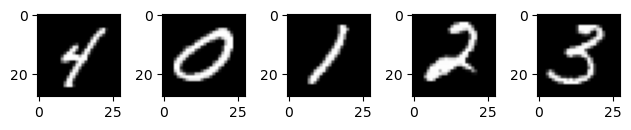

In [26]:
# Afficher l'évolution des prédictions pour quelques exemples
import numpy as np
import matplotlib.pyplot as plt
indice_image_grille=1
print("Évolution des prédictions pour les 5 premières images du dernier lot par epoch")
for indice in range(0,26,5):
    temp = liste_predictions[indice-1]['lot_predictions'].detach().numpy()
    print("Epoch:",indice)
    for idx in range(5):
        plt.subplot(1, 5,idx+1)
        plt.imshow(temp[idx].reshape(28,28),cmap= 'gray')
        indice_image_grille+=1
    plt.tight_layout()
    plt.show()

print("Images originales")
for idx in range(5): 
	plt.subplot(1,5,idx+1) 
	plt.imshow(liste_predictions[24]['lot_X'][idx].reshape(28, 28),cmap = 'gray') 
plt.tight_layout() 
plt.show()